Consider our data to have the following 3 sentence:

- I enjoy driving.
- I like banana.
- I like reading.

The co-occurence matrix will look like:

$$X = 
\begin{array}{c|lcr}
words & \text{I} & \text{enjoy} & \text{driving} & \text{like} & \text{banana} & \text{reading} &\text{.}\\
\hline
\text{I} & 0 & 1 & 0 & 2 & 0 & 0 & 0 \\
\text{enjoy} & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
\text{driving} & 0 & 1 & 0 & 0 & 0 & 0 & 1 \\
\text{like} & 2 & 0 & 0 & 0 & 1 & 1 & 0 \\
\text{banana} & 0 & 0 & 0 & 1 & 0 & 0 & 1 \\
\text{reading} & 0 & 0 & 0 & 1 & 0 & 0 & 1 \\
\text{.} & 0 & 0 & 1 & 0 & 1 & 1 & 0 \\
\end{array}
$$

In [1]:
words = ["I" "enjoy" "driving" "like" "banana" "reading" "."];
X =   [0 1 0 2 0 0 0;
       1 0 1 0 0 0 0;
       0 1 0 0 0 0 1;
       2 0 0 0 1 1 0;
       0 0 0 1 0 0 1;
       0 0 0 1 0 0 1
       0 0 1 0 1 1 0];

In [Julia](http://julia.readthedocs.org/en/latest/stdlib/linalg/), applying SVD on our matrix $X$ will give us $U$, $S$ and $V$ where: 

<center>$$A == U*diagm(S)*V^T$$</center>

In [2]:
U,S,V = svd(X);

In [3]:
U

7x7 Array{Float64,2}:
  0.723607      0.0          -5.55112e-17  …   0.276393      4.24034e-17
  2.77556e-16  -0.356822     -1.38778e-16     -3.747e-16    -5.54668e-32
  0.276393     -1.04083e-17   1.66533e-16      0.723607      1.73914e-18
 -2.22045e-16  -0.835549     -0.447214         1.94289e-16   2.46519e-32
  0.447214      7.08113e-18  -1.26097e-16     -0.447214      0.707107   
  0.447214      7.08113e-18  -1.26097e-16  …  -0.447214     -0.707107   
  0.0          -0.417775      0.894427        -8.32667e-17  -1.2326e-32 

In [4]:
S

7-element Array{Float64,1}:
 2.80252    
 2.80252    
 1.41421    
 1.41421    
 1.07047    
 1.07047    
 1.34641e-17

In [5]:
V

7x7 Array{Float64,2}:
 -0.0          -0.723607     -0.632456     …  -0.0           0.0        
  0.356822     -1.11022e-16   2.22045e-16      0.934172     -4.996e-16  
  1.52656e-16  -0.276393      0.632456        -6.10623e-16   4.7621e-18 
  0.835549      1.9845e-17   -1.78328e-16     -0.319151      1.01714e-16
  0.0          -0.447214      0.316228        -1.11022e-16  -0.707107   
  0.0          -0.447214      0.316228     …   4.44089e-16   0.707107   
  0.417775      0.0           0.0             -0.159576      2.11234e-16

>"A useful rule of thumb is to retain enough singular values to make up
>90% of the energy in Σ. That is, the sum of the squares of the retained
>singular values should be at least 90% of the sum of the squares of all the
>singular values." - Jeffrey D. Ullman

S matrix is the $\sum$, hence the total energy here is:

In [6]:
totEnergy = sum(S.^2)

22.0

In [7]:
energy = zeros(length(S));
energy[1] = S[1]^2/totEnergy;
for i=2:length(S)
    energy[i] = energy[i-1]+(S[i]^2/totEnergy);
end
energy

7-element Array{Float64,1}:
 0.357005
 0.714009
 0.804918
 0.895827
 0.947914
 1.0     
 1.0     

In [8]:
using PyPlot

INFO: Loading help data...


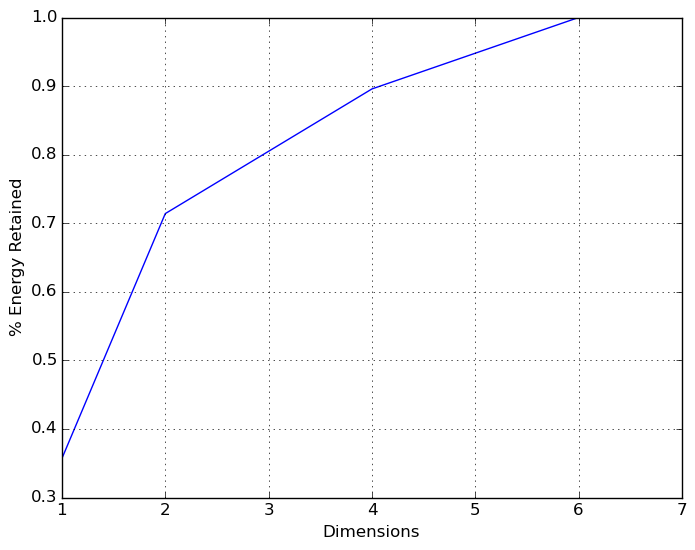

In [9]:
plot(1:length(energy), energy)
xlabel("Dimensions")
ylabel("% Energy Retained")
grid("on")

Looking at the plot we can determine that keeping 3 dimensions are good enough for us rather than all 6. We can also print/plot the words based on the first two columns of $U$ corresponding to the two biggest singular values.

In [10]:
Y = X[:,1:3]

7x3 Array{Int64,2}:
 0  1  0
 1  0  1
 0  1  0
 2  0  0
 0  0  0
 0  0  0
 0  0  1

In [11]:
U,S,V = svd(Y);

In [12]:
U

7x3 Array{Float64,2}:
 -1.87443e-17   0.707107     -1.09429e-16
 -0.541467      5.55112e-17  -0.51222    
 -2.81165e-17   0.707107     -1.64143e-16
 -0.831251     -1.11022e-16   0.444872   
  0.0           0.0           0.0        
  0.0           0.0           0.0        
 -0.125841      0.0          -0.734656   

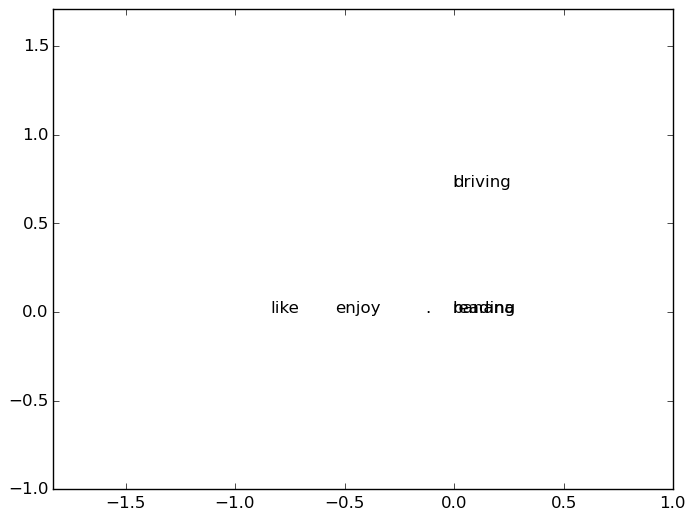

In [14]:
for w=1:length(words)
    plt.text(U[w,1], U[w,2], words[w]);
end
plt.xlim((minimum(U[:,1])-1, maximum(U[:,1])+1));
plt.ylim((minimum(U[:,2])-1, maximum(U[:,2])+1));